In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
import math 
import time
import os
import sys
from ctypes import *
from math import radians, cos, sin, asin, sqrt
%matplotlib inline
# %matplotlib nbagg
# import mpld3
# mpld3.enable_notebook()

#Find distance between two lan:lon points in meters
def meters(lat1, lon1, lat2, lon2):  
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c
    return d * 1000 # meters

def populate_firstlst_pts_df(file_src):
    global firstlst_pts_df
    
    firstlst_pts_df = firstlst_pts_df.iloc[0:0]
    firstlst_pts_df = pd.DataFrame()
    firstlst_pts_df['TrajId'] = 0
    firstlst_pts_df['File'] = 0
    firstlst_pts_df['Dist(km)'] = 0.0
    firstlst_pts_df['Time(hr)'] = 0.0
    firstlst_pts_df['Spd(km/hr)'] = 0.0
    
    for dirname, dirnames, filenames in os.walk(file_src):
        i = 0
        #import pdb; pdb.set_trace()
        for filename in filenames:
            if  filename.endswith('plt'):
                
                gpsfile = os.path.join(dirname, filename)
                log = open(gpsfile, 'r')
                points = log.readlines()[6:] # first 6 lines are useless
                pointNum = len(points)
                
                first_point = points[0].rstrip().split(',')
                last_point = points[len(points)-1].rstrip().split(',')
                start_time = first_point[6]
                end_time = last_point[6]
                trj_time = (datetime.strptime(end_time, time_format) - datetime.strptime(start_time, time_format)).seconds/3600

                #import pdb; pdb.set_trace()
                firstlst_pts_df.loc[i, 'File'] = filename
                firstlst_pts_df.loc[i, 'TrajId'] = i
                firstlst_pts_df.loc[i, 'Dist(km)'] =  meters(float(first_point[0]), float(first_point[1]), 
                                                         float(last_point[0]), float(last_point[1])) / 1000
                firstlst_pts_df.loc[i, 'Time(hr)'] = trj_time
                firstlst_pts_df.loc[i, 'Spd(km/hr)'] = ((firstlst_pts_df.loc[i, 'Dist(km)']) / 
                                                        (firstlst_pts_df.loc[i, 'Time(hr)']))
                i+=1
    
    
    

def avgspeed():
    
    mean = firstlst_pts_df['Spd(km/hr)'].mean()
    return mean

#------------------------------------------------------------
def main():
    for i in range(0, 182):
        user = "%03d"%i
        file_src = file_path + str(user) + '/Trajectory/'
 
        populate_firstlst_pts_df(file_src)
        avg_speed = avgspeed()

        avgspeed_df.loc[i, 'User'] = str(user)
        avgspeed_df.loc[i, 'AvgSpeed(Km/Hr)'] = avg_speed 
        
    dest_file = destination + " avgspeed_df.csv"
    avgspeed_df.to_csv(dest_file, sep='\t', encoding='utf-8')
#---------------------------------------------------------------
time_format = '%H:%M:%S'
firstlst_pts_df = pd.DataFrame()
avgspeed_df = pd.DataFrame()

avgspeed_df['User'] = 0
avgspeed_df['AvgSpeed(Km/Hr)'] = 0.0

file_path = 'C:/Users/12sha/Documents/Geolife Trajectories 1.3/Data/'
destination = 'C:/Users/12sha/Documents/thesislocation/Data/avgspeed/'

main()

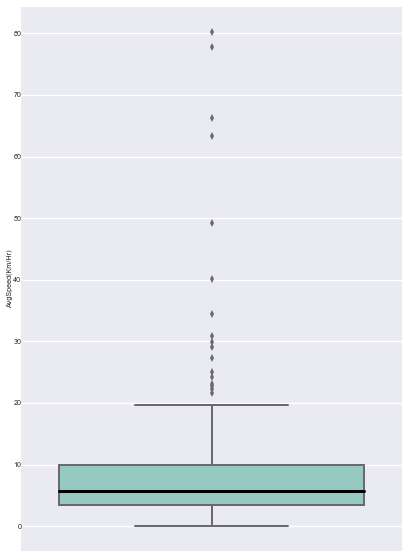

In [3]:
avgspeed_df['User'] = (avgspeed_df['User']).astype(int)
avg_vals = avgspeed_df.groupby('AvgSpeed(Km/Hr)').std()

## sns.set()
sns.set_context("talk")


plt.rcParams['figure.figsize']=15,10
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 6
sns.set_style("darkgrid")
params = {'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'ytick.major.pad':'0',
         'xtick.major.pad':'10', # for moving 'Pre-Comp' and 'Online' away from the axes
         'ytick.minor.pad':'0',
#          'xtick.minor.pad':'5',
         'axes.labelpad':'0'}
plt.rcParams.update(params)
plt.rc('pdf', fonttype=42) #embedded fonts
plt.figure();

ax = plt.subplot(121)
ax = sns.boxplot(y=avgspeed_df["AvgSpeed(Km/Hr)"], data=avg_vals,
                 palette="Set3", linewidth=2, medianprops={'color': 'k', 'linewidth': 3});